# CHAPTER 6: Decision Trees

- Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform
both classification and regression tasks, and even multioutput tasks.

## 6.1. Training and Visualizing a Decision Tree

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [50]:
iris = load_iris()
X = iris.data[:, (2,3)] #pteal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2,criterion='entropy', random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [51]:
X[0]

array([1.4, 0.2])

In [52]:
y[0]

0

In [53]:
tree_clf.predict(X[0:1])

array([0])

- Lets visulize the tree

[Text(223.2, 453.0, 'petal length (cm) <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(111.6, 271.8, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(334.79999999999995, 271.8, 'petal width (cm) <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(223.2, 90.59999999999997, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(446.4, 90.59999999999997, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

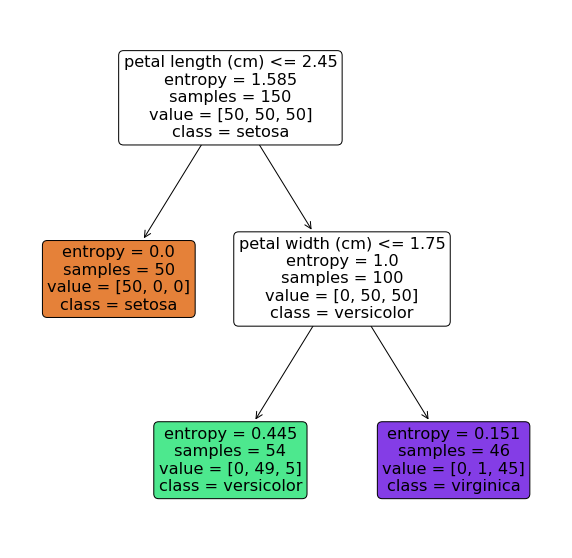

In [59]:
from sklearn import tree
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))

tree.plot_tree(tree_clf,
               feature_names= iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

## 6.2 Making Predictions

Text(3.2, 1.8, 'Depth=1')

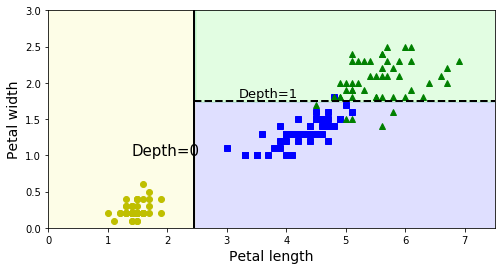

In [83]:
import numpy as np
from matplotlib.colors import ListedColormap

# this will be general function used also in next sections
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)

## 6.3 Predicting classes and class probabilities

In [84]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [85]:
tree_clf.predict([[5,1.5]])

array([1])

## 6.4 The CART Training Algorithm

- Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train
Decision Trees
- the CART algorithm is a greedy algorithm: it greedily
searches for an optimum split at the top level, then repeats the
process at each level. It does not check whether or not the split will
lead to the lowest possible impurity several levels down. A greedy
algorithm often produces a reasonably good solution, but it is not
guaranteed to be the optimal solution.

## 6.5 Computational Complexity

- Complexity for prediction is O(logm/log2)
- Complexity for training is O(n.m.logm)

n : number of features
m : number of instances

## 6.6 Gini Impurity or Entropy

- These are two measures used to make decision when splitting node into 2 sub-nodes.
- The value of gini or entropy is used in the CART cost function.
- The lower gini or entropy, the more purity (instances from same class belongs to node, not too much variaty)
- In Scikit Learn **criterion='gini'** is used, but you can change it to **criterion='entropy'**

- So should you use Gini impurity or entropy? The truth is, most of the time it does not
make a big difference: they lead to similar trees.
- Gini impurity is slightly faster to
compute, so it is a good default.
- However, when they differ, Gini impurity tends to
isolate the most frequent class in its own branch of the tree, while entropy tends to
produce slightly more balanced trees

## 6.7 Regularization Hyperparamters

- Decision Trees make very few assumptions about the training data (as opposed to linear
models, which obviously assume that the data is linear, for example).
- If left
unconstrained, the tree structure will adapt itself to the training data, fitting it very
closely, and most likely **overfitting** it.
- To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom
during training.
 - **max_depth**: the maximum depth of the Decision Tree.
 - **min_samples_split**: the minimum number of samples
a node must have before it can be split
 - **min_samples_leaf**:(the minimum number
of samples a leaf node must have
 - **min_weight_fraction_leaf**: same as min_samples_leaf but expressed as a fraction of the total number of weighted instances
 - **max_leaf_nodes**: maximum number of leaf nodes
 - **max_features**: maximum number of features that are evaluated for splitting at each node
 
**Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model.**

EX: 

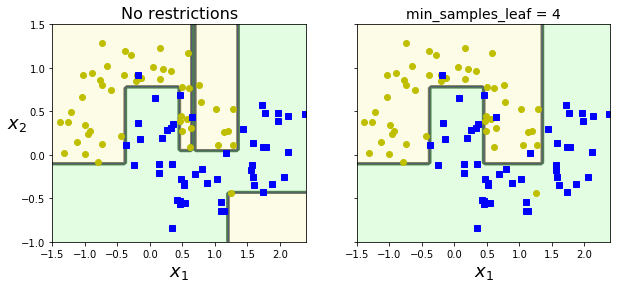

In [89]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")


plt.show()

## 6.8 Regression

- Decision Trees are also capable of performing regression tasks.
- Let’s build a regression
tree using Scikit-Learn’s DecisionTreeRegressor class, training it on a noisy
quadratic dataset with **max_depth=2:**

In [161]:
# Quadratic training set + noise
np.random.seed(42)
m=200
# create dataset mx1 consisting values between [0,1) uniform distribution
X=np.random.rand(m,1)

y = 4 * (X - 0.5) **2 + np.random.randn(m,1)/10

In [162]:
#ex
X[0:2], y[0:2]

(array([[0.37454012],
        [0.95071431]]),
 array([[-0.00504175],
        [ 0.83579891]]))

In [163]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

[Text(279.0, 453.0, 'x <= 0.197\nmse = 0.098\nsamples = 200\nvalue = 0.354'),
 Text(139.5, 271.8, 'x <= 0.092\nmse = 0.038\nsamples = 44\nvalue = 0.689'),
 Text(69.75, 90.59999999999997, 'mse = 0.018\nsamples = 20\nvalue = 0.854'),
 Text(209.25, 90.59999999999997, 'mse = 0.013\nsamples = 24\nvalue = 0.552'),
 Text(418.5, 271.8, 'x <= 0.772\nmse = 0.074\nsamples = 156\nvalue = 0.259'),
 Text(348.75, 90.59999999999997, 'mse = 0.015\nsamples = 110\nvalue = 0.111'),
 Text(488.25, 90.59999999999997, 'mse = 0.036\nsamples = 46\nvalue = 0.615')]

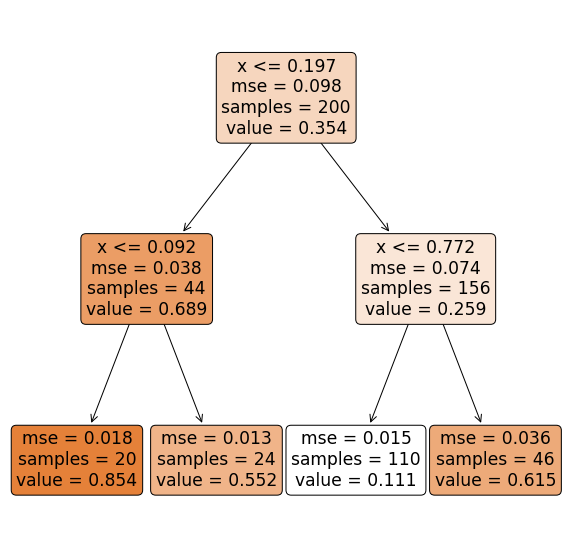

In [164]:
from sklearn import tree
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))

tree.plot_tree(tree_reg,
               feature_names= 'x1',
               class_names= 'y',
               rounded=True,
               filled=True)

Text(0.5, 1.0, 'max_depth=2')

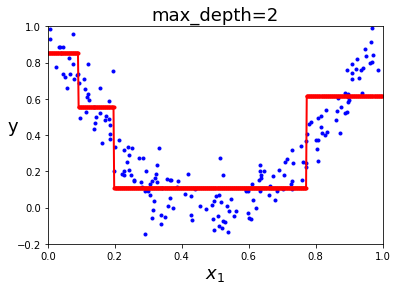

In [165]:
# simple version 

plt.plot(X,y, 'b.')
plt.axis([0,1,-0.2,1])

# create new x1 values for prediction
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = tree_reg.predict(x1)

plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.title('max_depth=2', fontsize=18)


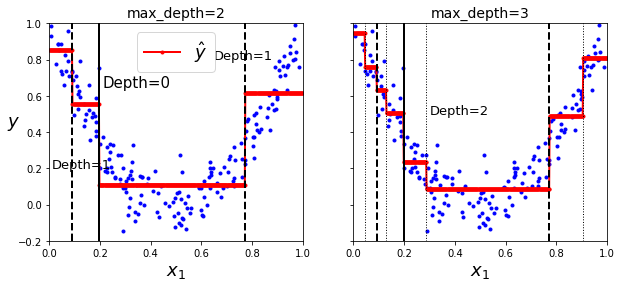

In [166]:
# book version

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# first chart for max_depth=2
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)

# for plotting the depth lines
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)



# second chart for max_depth=3
plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

- Just like for classification tasks, Decision Trees are prone to overfitting when dealing with regression tasks.
- Without any regularization (using the default hyperparameters), you get the predictions on the left. It is obviously overfitting the training set very badly.
- Just setting **min_samples_leaf=10** results in a much more reasonable model. (right

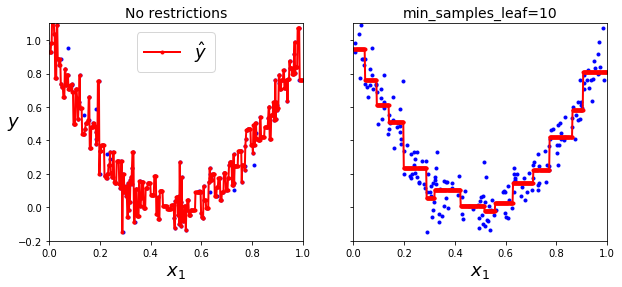

In [168]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)


plt.show()

## 6.8 Instability

- The main issue with Decision trees is that they are very sensitive to small variations in the training data. 
- Decision Trees is that they are very sensitive to
small variations in the training data. For example, if you just remove the widest Iris-
Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide)
and train a new Decision Tree, you may get the model represented in below figure.
- As you can see, it looks very different from the previous Decision Tree.(in section 6.2)

In [159]:
iris = load_iris()
X = iris.data[:, (2,3)] #petal length and width
y = iris.target

In [134]:
X[0:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [140]:
# this query consists of two parts
# choose the instance whose petal width is the highest,
# choose the Iris versicolor flower
X[(X[:,1] == X[:,1][y==1].max()) & (y==1)]

array([[4.8, 1.8]])

In [144]:
# choose all the instances where petal length is not widest OR all other classes (instead Iris versicolor)
indices_of_not_widest_versicolor = (X[:,1]!=1.8) | (y==2) | (y==0)

In [148]:
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

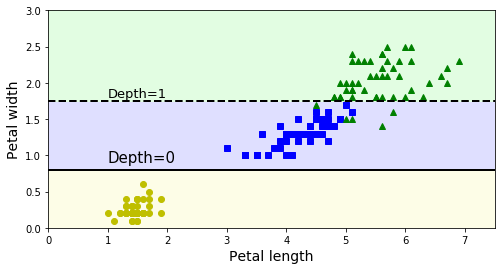

In [150]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

# EXERCISES

1. Train and fine-tune a Decision Tree for the moons dataset.

    a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).
    
    b. Split it into a training set and a test set using train_test_split().
    
    c. Use grid search with cross-validation (with the help of the GridSearchCV
    class) to find good hyperparameter values for a DecisionTreeClassifier.
    Hint: try various values for max_leaf_nodes.
    
    d. Train it on the full training set using these hyperparameters, and measure
    your model’s performance on the test set. You should get roughly 85% to 87%
    accuracy.

2. Grow a forest.

    a. Continuing the previous exercise, generate 1,000 subsets of the training set,
    each containing 100 instances selected randomly. Hint: you can use Scikit-
    Learn’s ShuffleSplit class for this.
    
    b. Train one Decision Tree on each subset, using the best hyperparameter values
    found above. Evaluate these 1,000 Decision Trees on the test set. Since they
    were trained on smaller sets, these Decision Trees will likely perform worse
    than the first Decision Tree, achieving only about 80% accuracy.
    
    c. Now comes the magic. For each test set instance, generate the predictions of
    the 1,000 Decision Trees, and keep only the most frequent prediction (you can
    use SciPy’s mode() function for this). This gives you majority-vote predictions
    over the test set.
    
    d. Evaluate these predictions on the test set: you should obtain a slightly higher
    accuracy than your first model (about 0.5 to 1.5% higher). Congratulations,
    you have trained a Random Forest classifier!

### Exercise 1 - Solution

1. Train and fine-tune a Decision Tree for the moons dataset.

    **a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).**

In [47]:
from sklearn.datasets import make_moons
dataset = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [48]:
dataset

(array([[ 0.9402914 ,  0.12230559],
        [ 0.12454026, -0.42477546],
        [ 0.26198823,  0.50841438],
        ...,
        [-0.24177973,  0.20957199],
        [ 0.90679645,  0.54958215],
        [ 2.08837082, -0.05050728]]),
 array([1, 0, 0, ..., 1, 0, 1], dtype=int64))

In [49]:
X = dataset[0]

In [50]:
y = dataset[1]

**b. Split it into a training set and a test set using train_test_split().**

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [64]:
X_train.shape

(8000, 2)

In [65]:
y_train.shape

(8000,)

**c. Use grid search with cross-validation (with the help of the GridSearchCV
class) to find good hyperparameter values for a DecisionTreeClassifier.
Hint: try various values for max_leaf_nodes.**

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)

param_grid = {'max_leaf_nodes': range(2,100), 'min_samples_split':[2,3,4]}
grid_search = GridSearchCV(tree_clf, param_grid=param_grid, cv=3, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    6.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': range(2, 100),
                      

In [68]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [69]:
grid_search.best_params_

{'max_leaf_nodes': 17, 'min_samples_split': 2}

**d. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.**

In [70]:
y_pred = grid_search.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.8695

### Exercise 2 - Solution

2. Grow a forest.

    **a. Continuing the previous exercise, generate 1,000 subsets of the training set,
    each containing 100 instances selected randomly. Hint: you can use Scikit-
    Learn’s ShuffleSplit class for this.**

In [97]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances=100

rs = ShuffleSplit(n_splits=n_trees, train_size=n_instance, random_state=42)

# This is also same
# rs2 = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)

In [102]:
# Just to show 
for train_index, test_index in rs.split(X_train):
    print(train_index.shape, test_index.shape)
    print("TRAIN:", train_index, "TEST:", test_index, sep='\n\n')
    break
    
#note: mini_test_index is not important for us, we will use X_test anyway (not mini)

(100,) (7900,)
TRAIN:

[4798 1500 3843 5225 2613 3461 1021 3073 7555 3943 1585 1955 3152 6349
   34 4014  775 2556 7595 1478 7099 5486 6235 1363 7041 2612 7513 2824
 2041  241 2061 2363  600 2435 5393 6310 2888 6164  646 3890 3556 3202
 1528 6975 1267 7734 1899 4658 3005 2734 7101  189 1806  975 2747 7643
 2047 7849 2558 1082  474 7728 2904 4843 6396 4117 3385 4555 1184 6420
 5051 5311 2433 6949 7581 5611 2391  769 7476 1685  130 7831 2919 3171
 3444 6231 5578 4426 5334  466 6265 5734 3092 3772 5191 5226 5390  860
 7603 7270]

TEST:

[2215 2582 1662 ... 5675 6873 6545]


In [105]:
# this list will keep the X,y mini pairs
mini_sets = []

# note mini_test_index is not important for us, we will use X_test anyway (not mini)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))


**b. Train one Decision Tree on each subset, using the best hyperparameter values
found above. Evaluate these 1,000 Decision Trees on the test set. Since they
were trained on smaller sets, these Decision Trees will likely perform worse
than the first Decision Tree, achieving only about 80% accuracy.**

In [106]:
# remember the best parameters
grid_search.best_params_

{'max_leaf_nodes': 17, 'min_samples_split': 2}

In [108]:
from sklearn.base import clone 

# create 1000 decision tree from best tree
forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree,(X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train,y_mini_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_pred,y_test))

In [110]:
import numpy as np
np.mean(accuracy_scores)

0.8054499999999999

**c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This gives you majority-vote predictions over the test set.**

In [126]:

# create an empty numpy array 1000x2000 (1000 tree, each predicts 2000 values)
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [129]:
from scipy.stats import mode

#find the most frequent predictions
y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)
y_pred_majority_votes, n_votes 

(array([[1, 1, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[951, 912, 963, ..., 919, 994, 602]]))

In [130]:
Y_pred.shape

(1000, 2000)

In [ ]:
# how to intrepret this result
"""
There are 1000 predictions for the instance X_test[0] from 1000 different trees.
Among these 951 of them are predict y as 1, the rest predict it as 0.
"""

In [132]:
y_pred_majority_votes

array([[1, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [133]:
y_test

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
#to make them same dimensions
y_pred_majority_votes = y_pred_majority_votes.reshape(-1)
y_pred_majority_votes

array([1, 1, 0, ..., 0, 0, 0], dtype=uint8)

**d. Evaluate these predictions on the test set: you should obtain a slightly higher
accuracy than your first model (about 0.5 to 1.5% higher). Congratulations,
you have trained a Random Forest classifier!**

In [140]:
accuracy_score(y_pred_majority_votes, y_test)

0.872